You are using pip version 9.0.1, however version 22.0.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


2.8.0


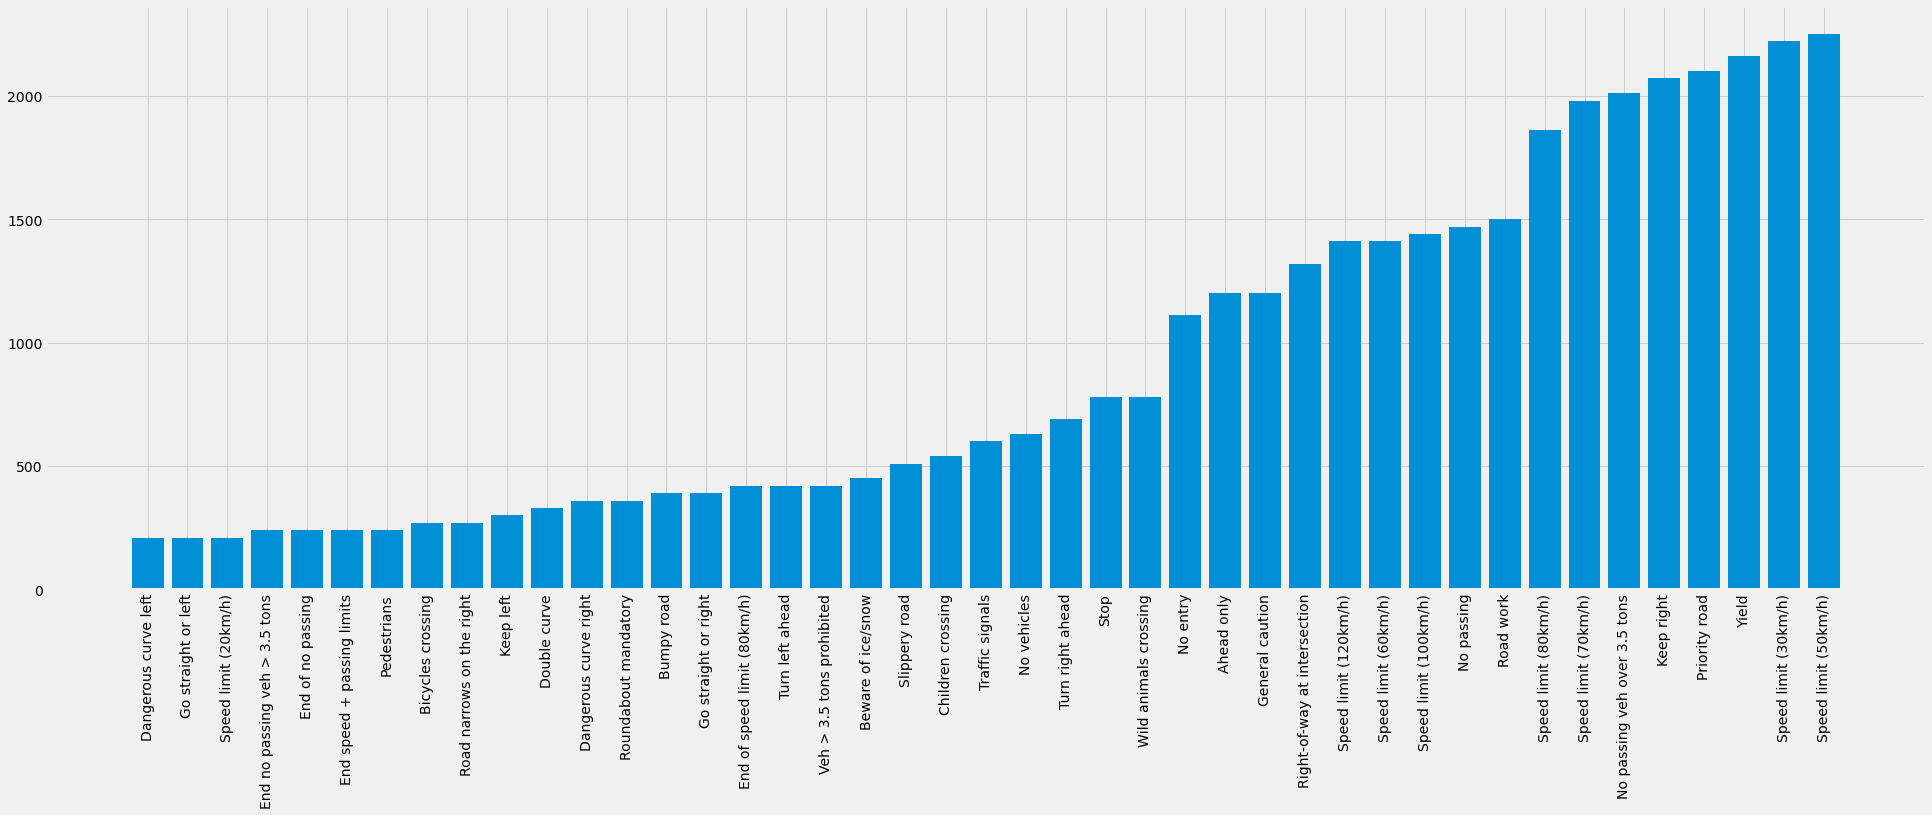

(39209, 20, 20, 3) (39209,)
X_train.shape (23525, 20, 20, 3)
X_valid.shape (15684, 20, 20, 3)
y_train.shape (23525,)
y_valid.shape (15684,)
(23525, 43)
(15684, 43)


C:\Users\Admin\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20


In [ ]:
import os
#Root = "/content/drive/MyDrive/Colab_Notebook/TSF/Traffic_sign_classification"
Root = r'C:\Users\Admin\Downloads\project folder\archive'
os.chdir(Root)

!pip install tensorflow==1.14.0
import tensorflow as tf
print(tf.__version__)
    

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')


data_dir = r'C:\Users\Admin\Downloads\project folder\archive'
train_path = r'C:\Users\Admin\Downloads\project folder\archive\Train'
test_path = r'C:\Users\Admin\Downloads\project folder\archive\Test'

# Resizing the images to 30x30x3
image_height = 20
image_width = 20
#3 channels RGB
channels = 3

Total_categories = len(os.listdir(train_path))
Total_categories

Total_categories = len(os.listdir(train_path))
Total_categories

# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }


data_folder = os.listdir(train_path)

train_image_numbers = []
class_number = []

for folder in data_folder:
    train_fileset = os.listdir(train_path + '/' + folder)
    train_image_numbers.append(len(train_fileset))
    class_number.append(classes[int(folder)])
    
#Sort the dataset based on number of images
zipLists = zip(train_image_numbers, class_number)
sortedPairs = sorted(zipLists)
tuples = zip(*sortedPairs)
train_image_numbers, class_number = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(30,10))
plt.bar(class_number, train_image_numbers)
plt.xticks(class_number, rotation='vertical')
plt.show()


imgData = []
imgLabels = []

for i in range(Total_categories):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((image_height, image_width))
            imgData.append(np.array(resize_image))
            imgLabels.append(i)
        except:
            print("Error in " + img)

# change the list to numpy array
imgData = np.array(imgData)
imgLabels = np.array(imgLabels)

print(imgData.shape, imgLabels.shape)

shuffleImages = np.arange(imgData.shape[0])
np.random.shuffle(shuffleImages)
imgData = imgData[shuffleImages]
imgLabels = imgLabels[shuffleImages]

X_train, X_val, y_train, y_val = train_test_split(imgData, imgLabels, test_size=0.4, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

y_train = keras.utils.to_categorical(y_train, Total_categories)
y_val = keras.utils.to_categorical(y_val, Total_categories)

print(y_train.shape)
print(y_val.shape)

model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(image_height,image_width,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

lr = 0.001
epochs = 20

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


aug = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

model.save("model.h5")

dir(aug)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

test = pd.read_csv(data_dir + '\Test.csv')


labelValues = test["ClassId"].values
imgValues = test["Path"].values

data =[]

for img in imgValues:
    try:
        image = cv2.imread(data_dir + '\\' + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((image_height, image_width))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

#pred = model.predict_classes(X_test)
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

#test data accuracy is :
print('Test Data accuracy: ',accuracy_score(labelValues, classes_x)*100)


from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labelValues, classes_x)

import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (25,25))
sns.heatmap(df_cm, annot=True)



              precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       0.97      0.99      0.98       720
           2       0.95      0.99      0.97       750
           3       0.99      0.98      0.98       450
           4       1.00      0.97      0.98       660
           5       0.98      0.94      0.96       630
           6       1.00      0.99      0.99       150
           7       1.00      0.98      0.99       450
           8       0.98      1.00      0.99       450
           9       0.99      1.00      0.99       480
          10       1.00      1.00      1.00       660
          11       1.00      0.93      0.96       420
          12       0.99      0.97      0.98       690
          13       1.00      0.99      1.00       720
          14       1.00      1.00      1.00       270
          15       0.96      0.99      0.98       210
          16       0.97      1.00      0.99       150
          17       1.00    

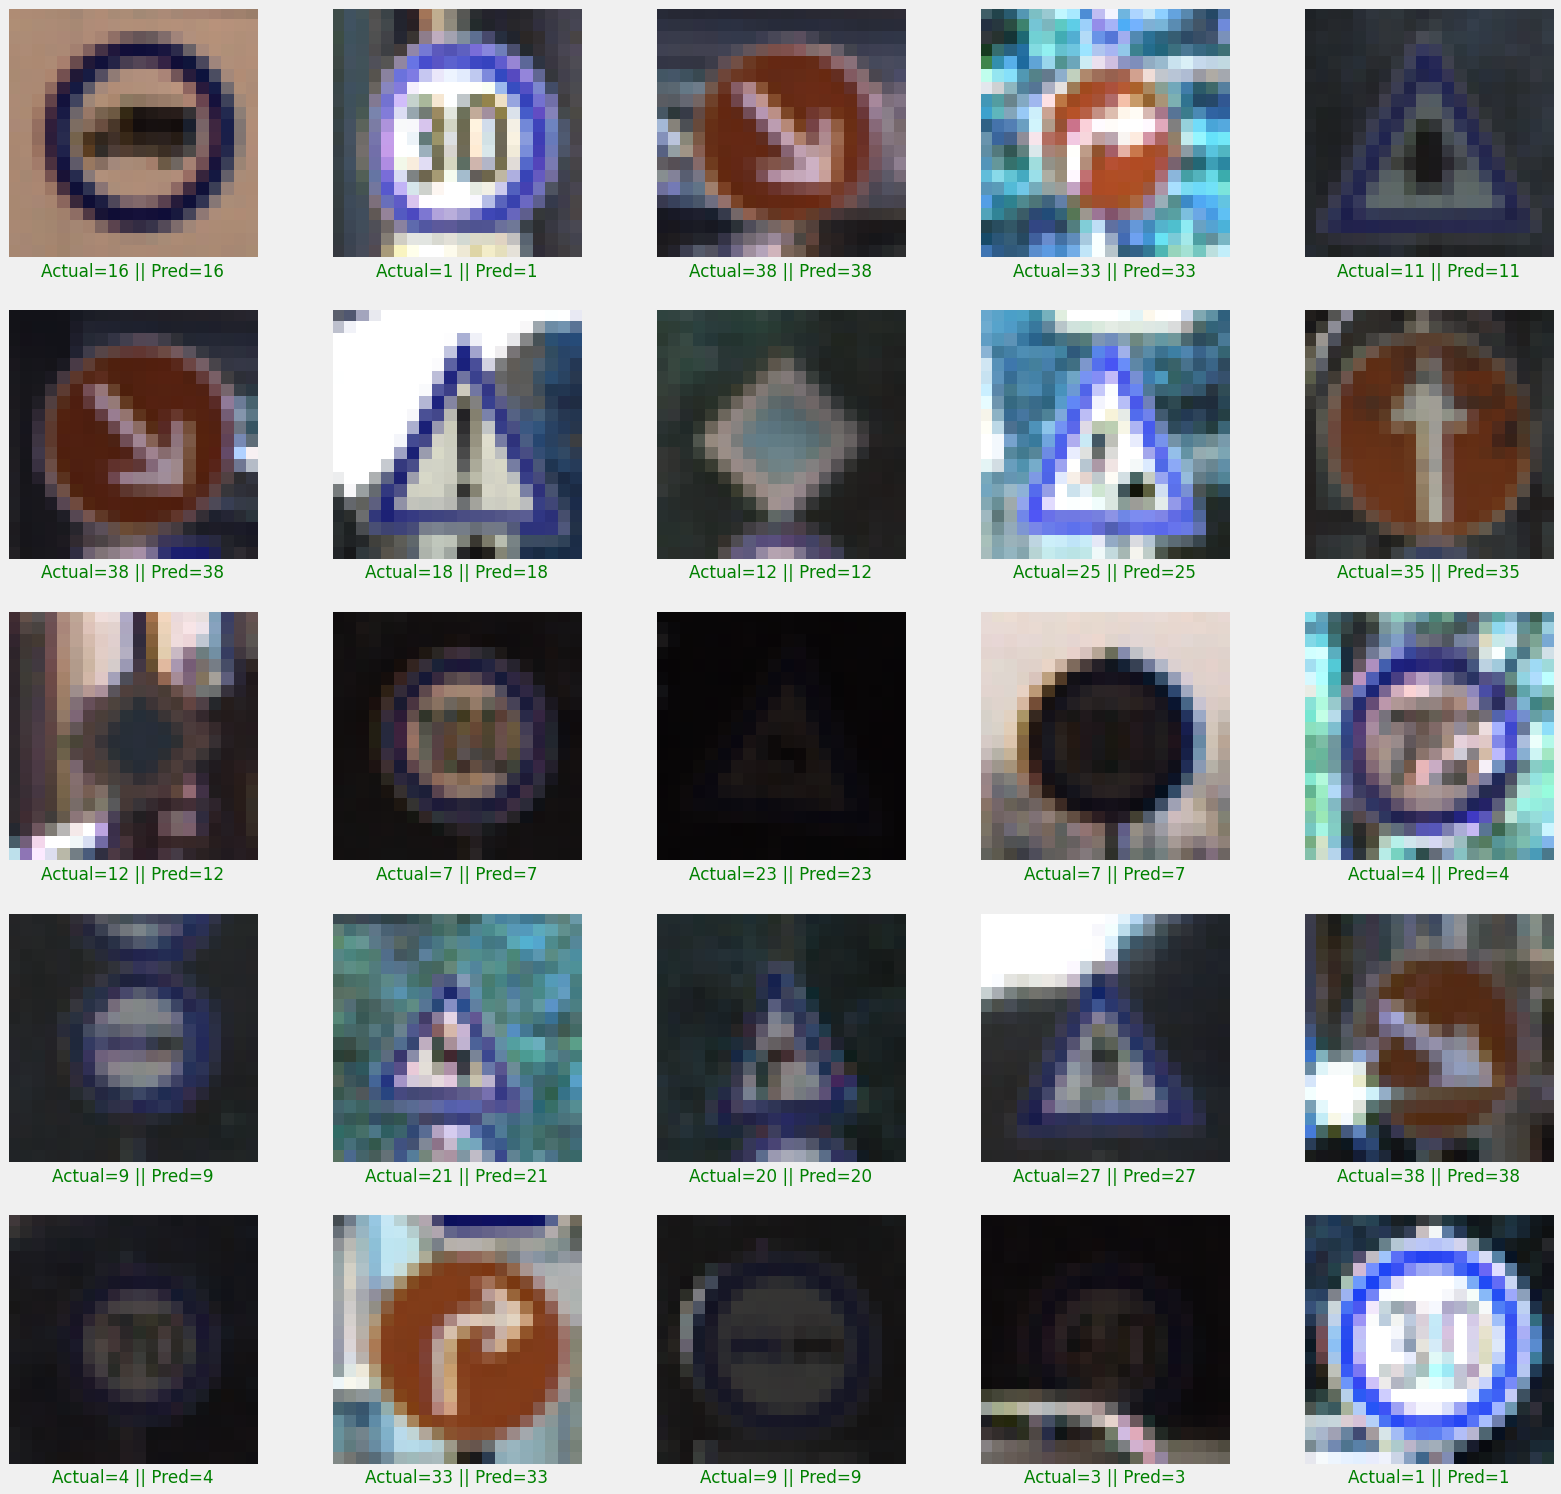

In [5]:
from sklearn.metrics import classification_report

print(classification_report(labelValues, classes_x))

plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = classes_x[start_index + i]
    actual = labelValues[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

